In [4]:
from brainflow.board_shim import BoardShim, BrainFlowInputParams, LogLevels, BoardIds
from brainflow.data_filter import DataFilter, FilterTypes, AggOperations, NoiseTypes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import np_utils

In [2]:
restored_data = pd.read_csv("dist/saves/Unprocessed.csv") 

In [3]:
restored_data

,WORD,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8
0,Obrigado,19.829128,48.859758,57.840008,38.627975,-3.023271,-30.730812,15.521113,185.959678
1,Obrigado,20.414222,45.697544,45.833263,12.330663,-4.172797,15.852235,84.500880,140.728722
2,Obrigado,22.185210,46.990720,30.976623,-8.680270,-15.869186,59.868206,130.356870,155.262739
3,Obrigado,22.570144,39.646193,16.032045,-24.286516,22.819753,115.371371,174.862563,83.941546
4,Obrigado,23.767602,36.230388,-1.848202,-7.470266,65.981754,125.897508,112.333566,-37.714460
...,...,...,...,...,...,...,...,...,...
1247,Bebida,15.106123,40.830602,71.628785,98.557935,105.409268,110.519622,92.685456,48.920538
1248,Bebida,16.910080,46.993276,67.491939,80.279063,82.498551,48.988498,27.131523,-12.605269
1249,Bebida,18.149618,44.881522,70.565815,66.947595,38.822297,-22.787538,-47.519656,-27.092588
1250,Bebida,19.353378,46.979799,60.109231,38.416928,4.350982,-42.922511,-9.573731,93.185819


In [13]:
board_id = BoardIds.CYTON_BOARD.value
eeg_channels = BoardShim.get_eeg_channels(board_id)
print(eeg_channels)
df_channels = list(map(lambda x: "Channel_%s" % (x), eeg_channels))
print(df_channels)

[1, 2, 3, 4, 5, 6, 7, 8]
['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5', 'Channel_6', 'Channel_7', 'Channel_8']


In [7]:
eeg_channels

[1, 2, 3, 4, 5, 6, 7, 8]

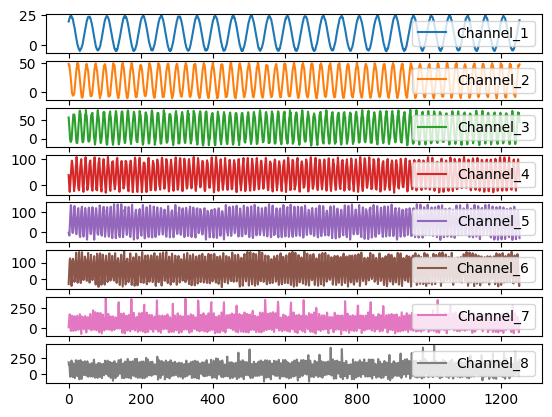

In [46]:
axs = restored_data[df_channels].plot(subplots=True)
for i,ax in enumerate(axs):
    axs[i].legend(loc="upper right")

plt.show()

In [47]:
for count, channel in enumerate(df_channels):
        # filters work in-place
        if count == 0:
            DataFilter.perform_bandpass(restored_data[channel], BoardShim.get_sampling_rate(board_id), 2.0, 50.0, 4,
                                        FilterTypes.BESSEL.value, 0)
        elif count == 1:
            DataFilter.perform_bandstop(restored_data[channel], BoardShim.get_sampling_rate(board_id), 48.0, 52.0, 3,
                                        FilterTypes.BUTTERWORTH.value, 0)
        elif count == 2:
            DataFilter.perform_lowpass(restored_data[channel], BoardShim.get_sampling_rate(board_id), 50.0, 5,
                                       FilterTypes.CHEBYSHEV_TYPE_1.value, 1)
        elif count == 3:
            DataFilter.perform_highpass(restored_data[channel], BoardShim.get_sampling_rate(board_id), 2.0, 4,
                                        FilterTypes.BUTTERWORTH.value, 0)
        elif count == 4:
            DataFilter.perform_rolling_filter(restored_data[channel], 3, AggOperations.MEAN.value)
        else:
            DataFilter.remove_environmental_noise(restored_data[channel], BoardShim.get_sampling_rate(board_id),
                                                  NoiseTypes.FIFTY.value)

restored_data[df_channels].plot(subplots=True)

KeyError: 'C_CONTIGUOUS'

In [10]:
from backend.training import train_data

<Figure size 640x480 with 0 Axes>

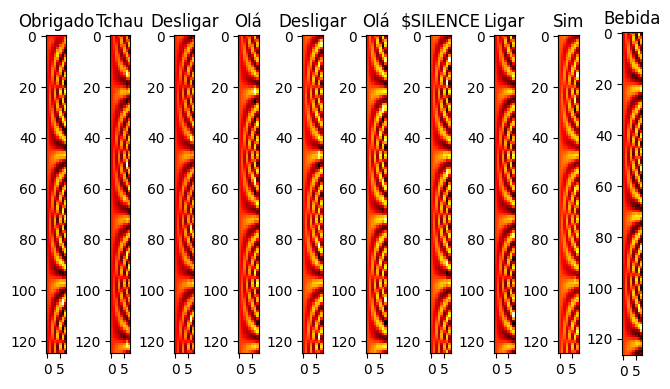

In [33]:
train_data("Saveto", 80, ["Unprocessed"])

In [8]:
%load_ext autoreload

In [9]:
%autoreload 2